### Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

### Dataset loading and Basic Info

In [17]:
print("Loading Titanic Dataset...")
titanic = sns.load_dataset('titanic')
print(f"Dataset loaded successfully with shape: {titanic.shape}")

print("\nDataset Info:")
print(titanic.info())

print("\nDataset Shape:")
print(f"Rows: {titanic.shape[0]}, Columns: {titanic.shape[1]}")

print("\nFirst 10 rows:")
print(titanic.head(10))

print("\nLast 5 rows:")
print(titanic.tail())

print("\nColumn names and data types:")
print(titanic.dtypes)

print("\nMissing values analysis:")
missing_values = titanic.isnull().sum()
missing_percentage = (missing_values / len(titanic)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)
print(missing_df)


Loading Titanic Dataset...
Dataset loaded successfully with shape: (891, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usa

### Descriptive Information

In [18]:
print("\nDescriptive Statistics for Numerical Variables:")
print(titanic.describe())

print("\nDescriptive Statistics for Categorical Variables:")
print(titanic.describe(include='object'))

print("\n2Survival Rate Analysis:")
survival_stats = titanic['survived'].value_counts()
survival_rate = titanic['survived'].mean()
print(f"Survival Count:\n{survival_stats}")
print(f"Overall Survival Rate: {survival_rate:.3f} ({survival_rate*100:.1f}%)")

print("\nUnique values in each column:")
for col in titanic.columns:
    print(f"{col}: {titanic[col].nunique()} unique values")



Descriptive Statistics for Numerical Variables:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Descriptive Statistics for Categorical Variables:
         sex embarked  who  embark_town alive
count    891      889  891          889   891
unique     2        3    3            3     2
top     male        S  man  Southampton    no
freq     577  

### Missing Values Visualization

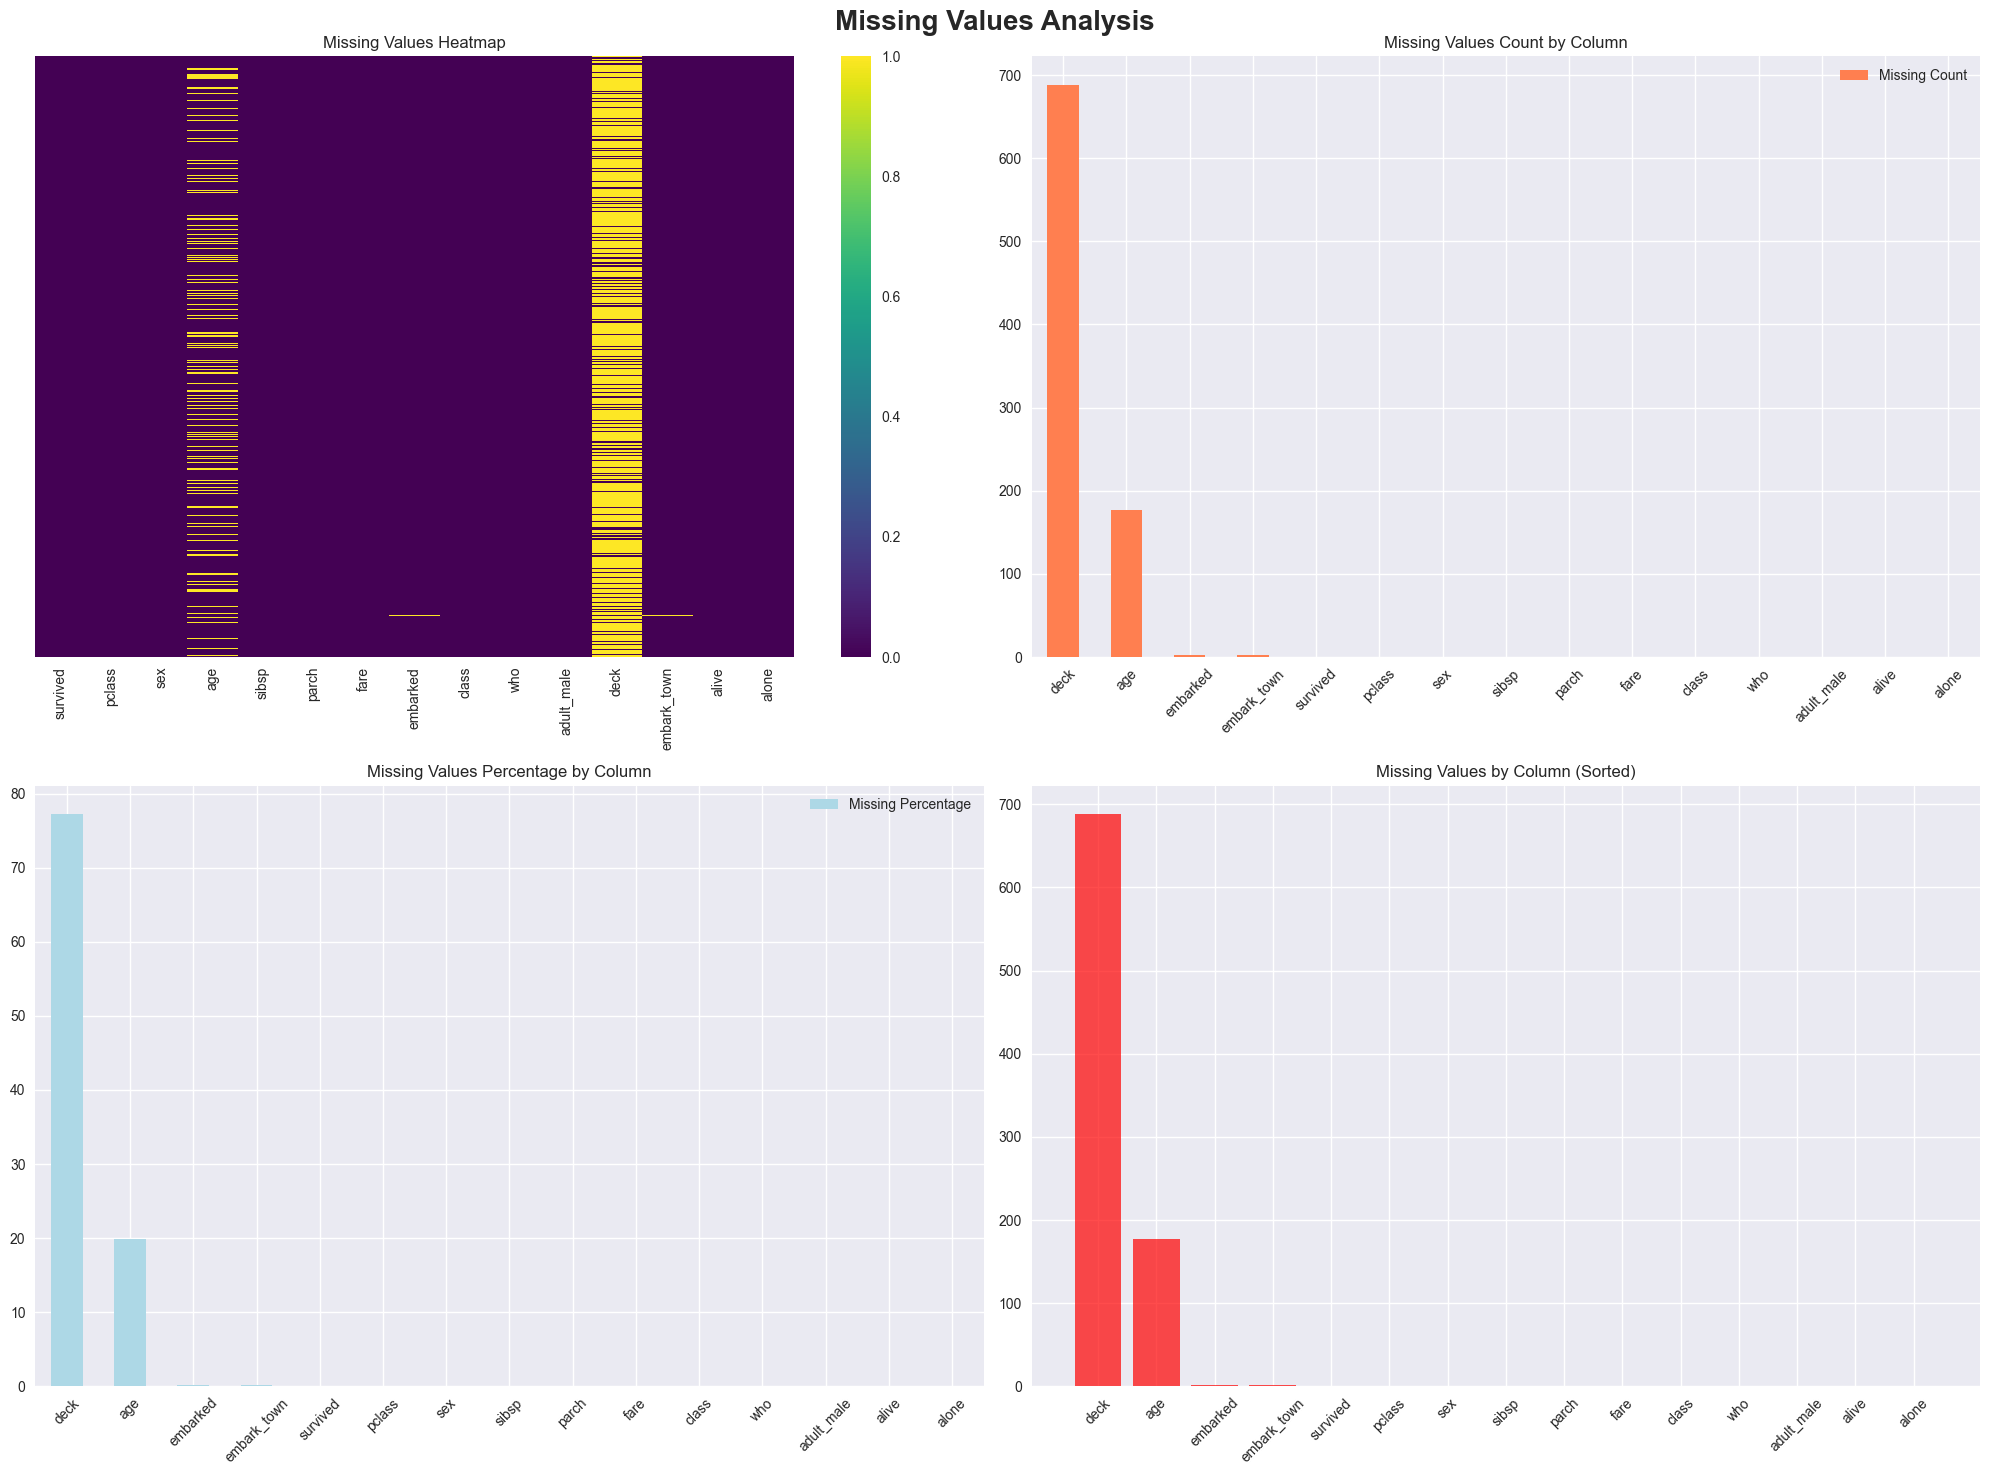

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Missing Values Analysis', fontsize=20, fontweight='bold')

sns.heatmap(titanic.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[0,0])
axes[0,0].set_title('Missing Values Heatmap')

missing_df.plot(kind='bar', y='Missing Count', ax=axes[0,1], color='coral')
axes[0,1].set_title('Missing Values Count by Column')
axes[0,1].tick_params(axis='x', rotation=45)

missing_df.plot(kind='bar', y='Missing Percentage', ax=axes[1,0], color='lightblue')
axes[1,0].set_title('Missing Values Percentage by Column')
axes[1,0].tick_params(axis='x', rotation=45)

msno_data = titanic.isnull().sum().sort_values(ascending=False)
axes[1,1].bar(range(len(msno_data)), msno_data.values, color='red', alpha=0.7)
axes[1,1].set_xticks(range(len(msno_data)))
axes[1,1].set_xticklabels(msno_data.index, rotation=45)
axes[1,1].set_title('Missing Values by Column (Sorted)')

plt.tight_layout()
plt.show()


### Survival Analysis Visualization

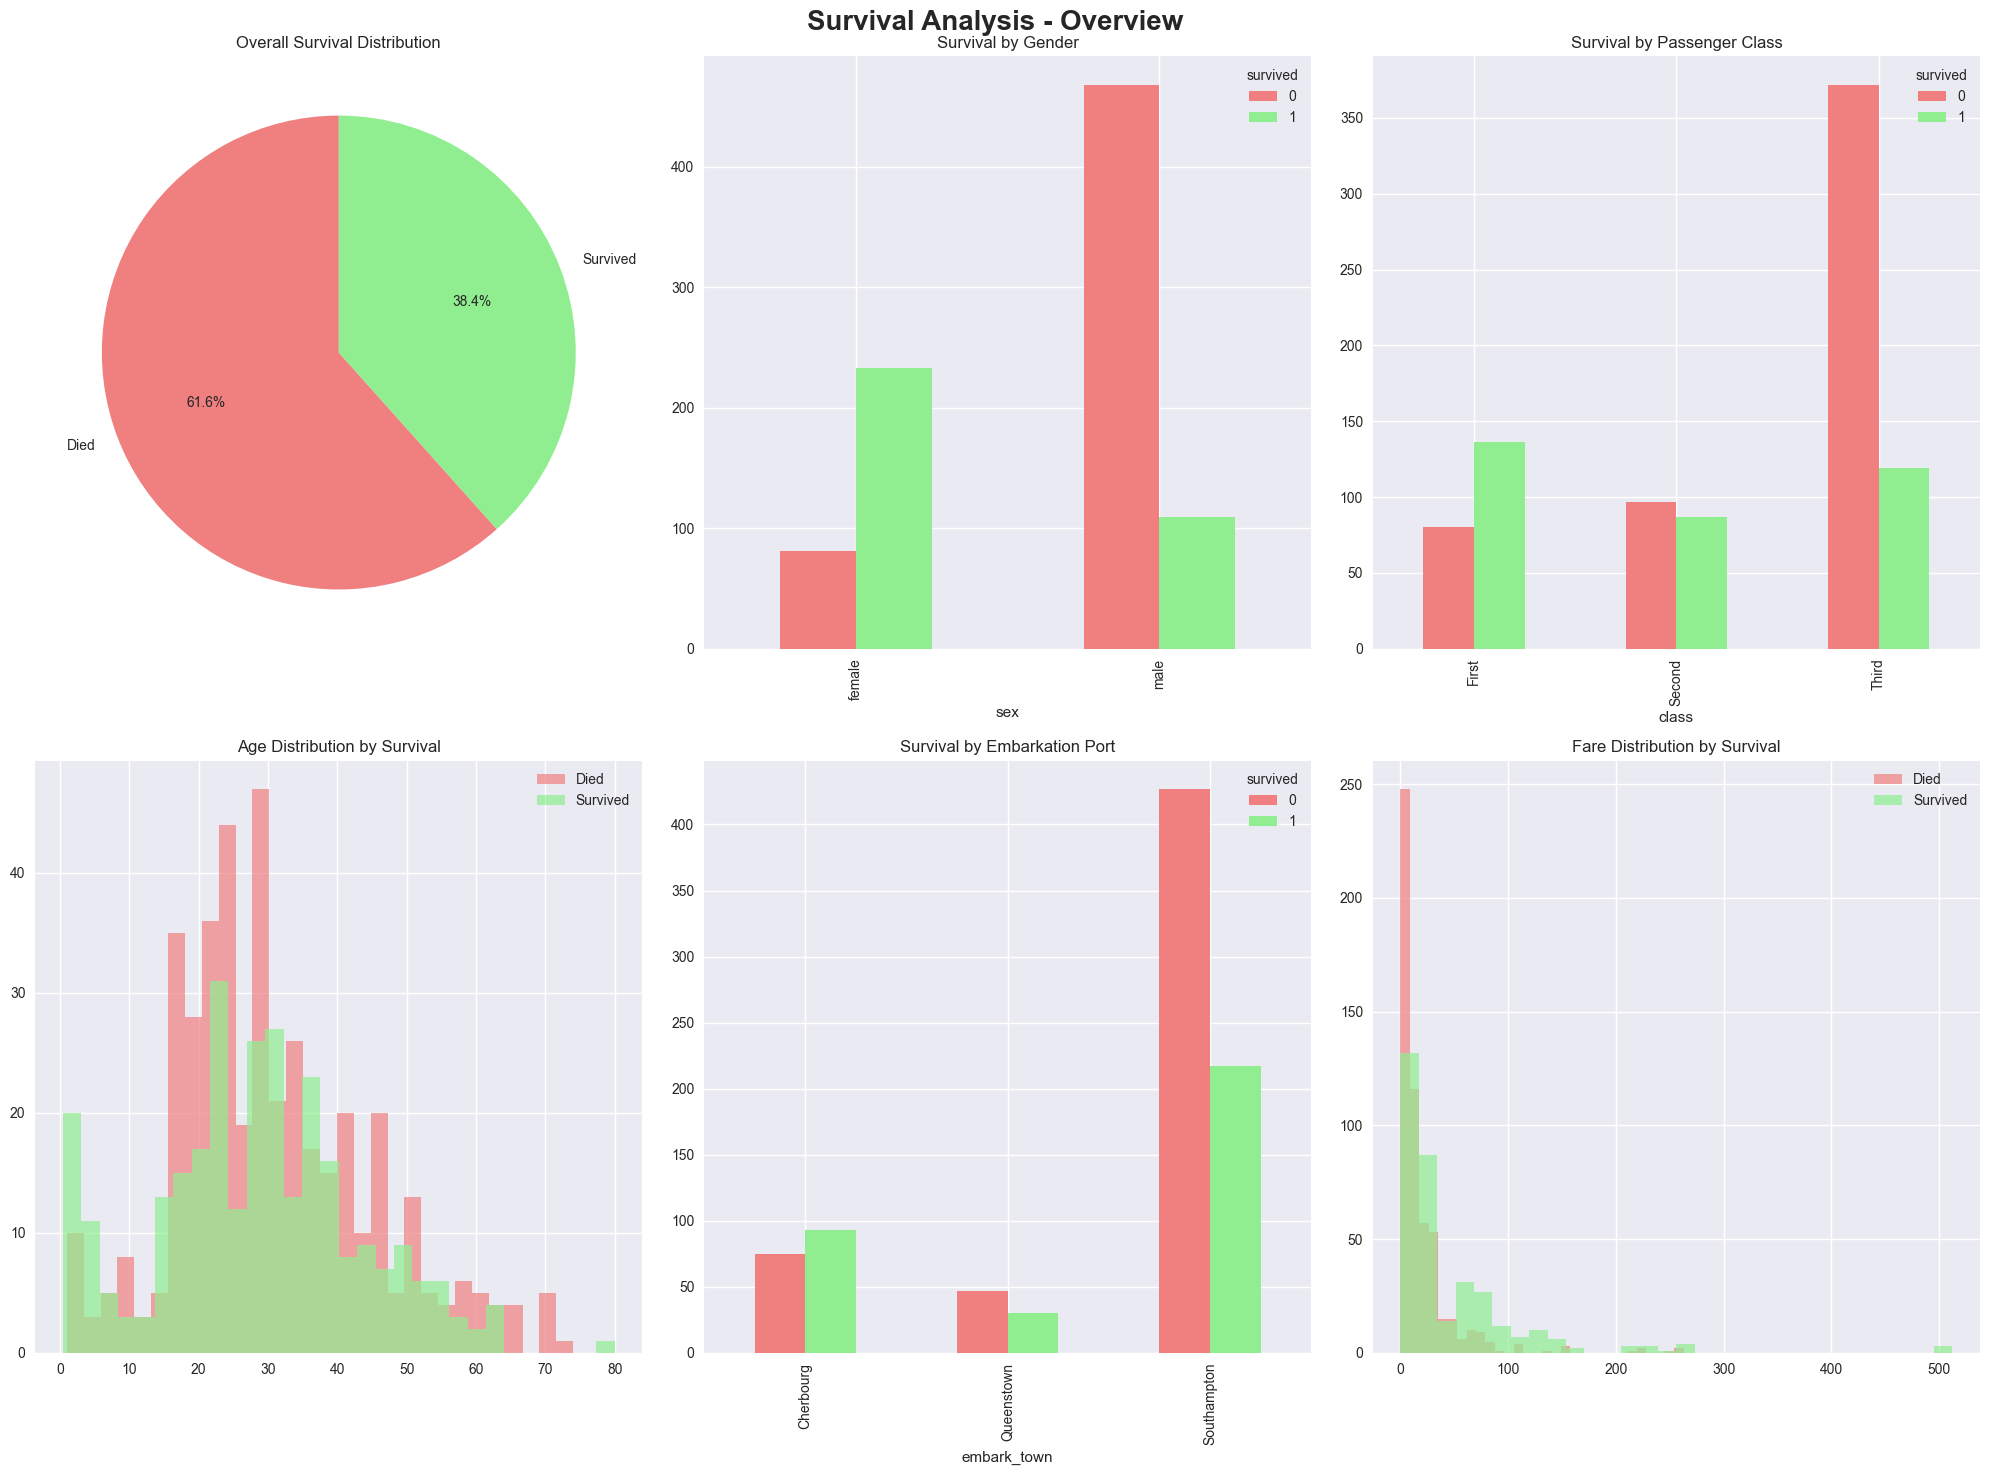

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Survival Analysis - Overview', fontsize=20, fontweight='bold')

survival_counts = titanic['survived'].value_counts()
axes[0,0].pie(survival_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%', 
              colors=['lightcoral', 'lightgreen'], startangle=90)
axes[0,0].set_title('Overall Survival Distribution')

pd.crosstab(titanic['sex'], titanic['survived']).plot(kind='bar', ax=axes[0,1], 
                                                      color=['lightcoral', 'lightgreen'])
axes[0,1].set_title('Survival by Gender')

pd.crosstab(titanic['class'], titanic['survived']).plot(kind='bar', ax=axes[0,2], 
                                                        color=['lightcoral', 'lightgreen'])
axes[0,2].set_title('Survival by Passenger Class')

titanic[titanic['survived']==0]['age'].hist(bins=30, alpha=0.7, ax=axes[1,0], 
                                           color='lightcoral', label='Died')
titanic[titanic['survived']==1]['age'].hist(bins=30, alpha=0.7, ax=axes[1,0], 
                                           color='lightgreen', label='Survived')
axes[1,0].set_title('Age Distribution by Survival')
axes[1,0].legend()

pd.crosstab(titanic['embark_town'], titanic['survived']).plot(kind='bar', ax=axes[1,1], 
                                                             color=['lightcoral', 'lightgreen'])
axes[1,1].set_title('Survival by Embarkation Port')

titanic[titanic['survived']==0]['fare'].hist(bins=30, alpha=0.7, ax=axes[1,2], 
                                            color='lightcoral', label='Died')
titanic[titanic['survived']==1]['fare'].hist(bins=30, alpha=0.7, ax=axes[1,2], 
                                            color='lightgreen', label='Survived')
axes[1,2].set_title('Fare Distribution by Survival')
axes[1,2].legend()

plt.tight_layout()
plt.show()


### Demographic Analysis

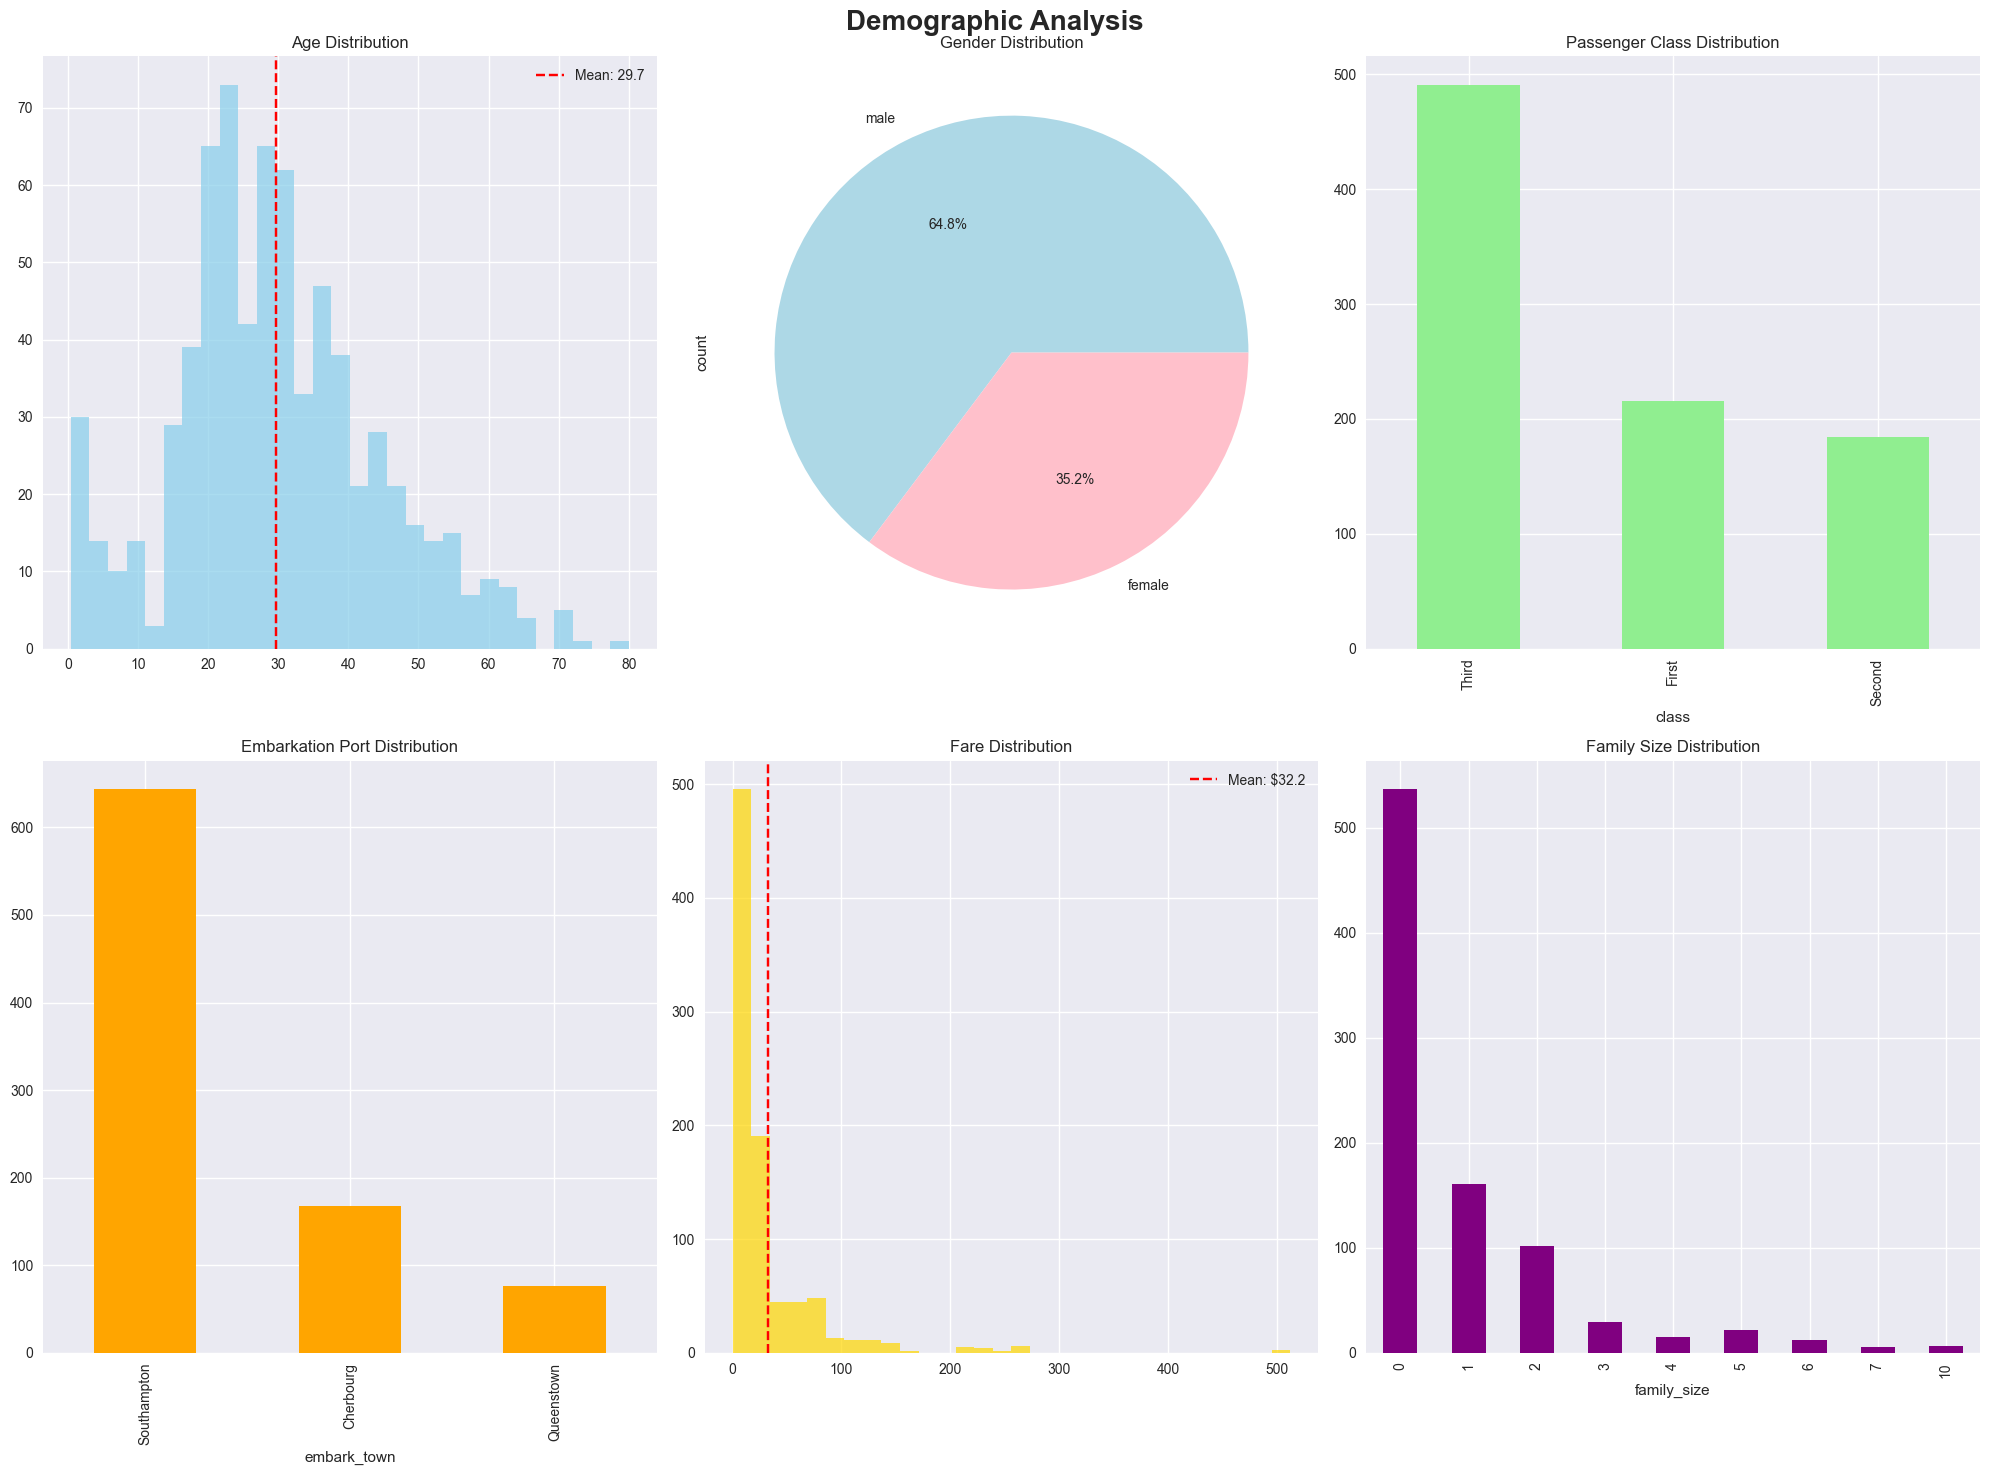

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Demographic Analysis', fontsize=20, fontweight='bold')

# Age distribution
titanic['age'].hist(bins=30, ax=axes[0,0], color='skyblue', alpha=0.7)
axes[0,0].set_title('Age Distribution')
axes[0,0].axvline(titanic['age'].mean(), color='red', linestyle='--', label=f'Mean: {titanic["age"].mean():.1f}')
axes[0,0].legend()

# Gender distribution
titanic['sex'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', colors=['lightblue', 'pink'])
axes[0,1].set_title('Gender Distribution')

# Class distribution
titanic['class'].value_counts().plot(kind='bar', ax=axes[0,2], color='lightgreen')
axes[0,2].set_title('Passenger Class Distribution')

# Embarkation port distribution
titanic['embark_town'].value_counts().plot(kind='bar', ax=axes[1,0], color='orange')
axes[1,0].set_title('Embarkation Port Distribution')

# Fare distribution
titanic['fare'].hist(bins=30, ax=axes[1,1], color='gold', alpha=0.7)
axes[1,1].set_title('Fare Distribution')
axes[1,1].axvline(titanic['fare'].mean(), color='red', linestyle='--', label=f'Mean: ${titanic["fare"].mean():.1f}')
axes[1,1].legend()

# Family size distribution
titanic['family_size'] = titanic['sibsp'] + titanic['parch']
titanic['family_size'].value_counts().sort_index().plot(kind='bar', ax=axes[1,2], color='purple')
axes[1,2].set_title('Family Size Distribution')

plt.tight_layout()
plt.show()


### Statistical Visualizations

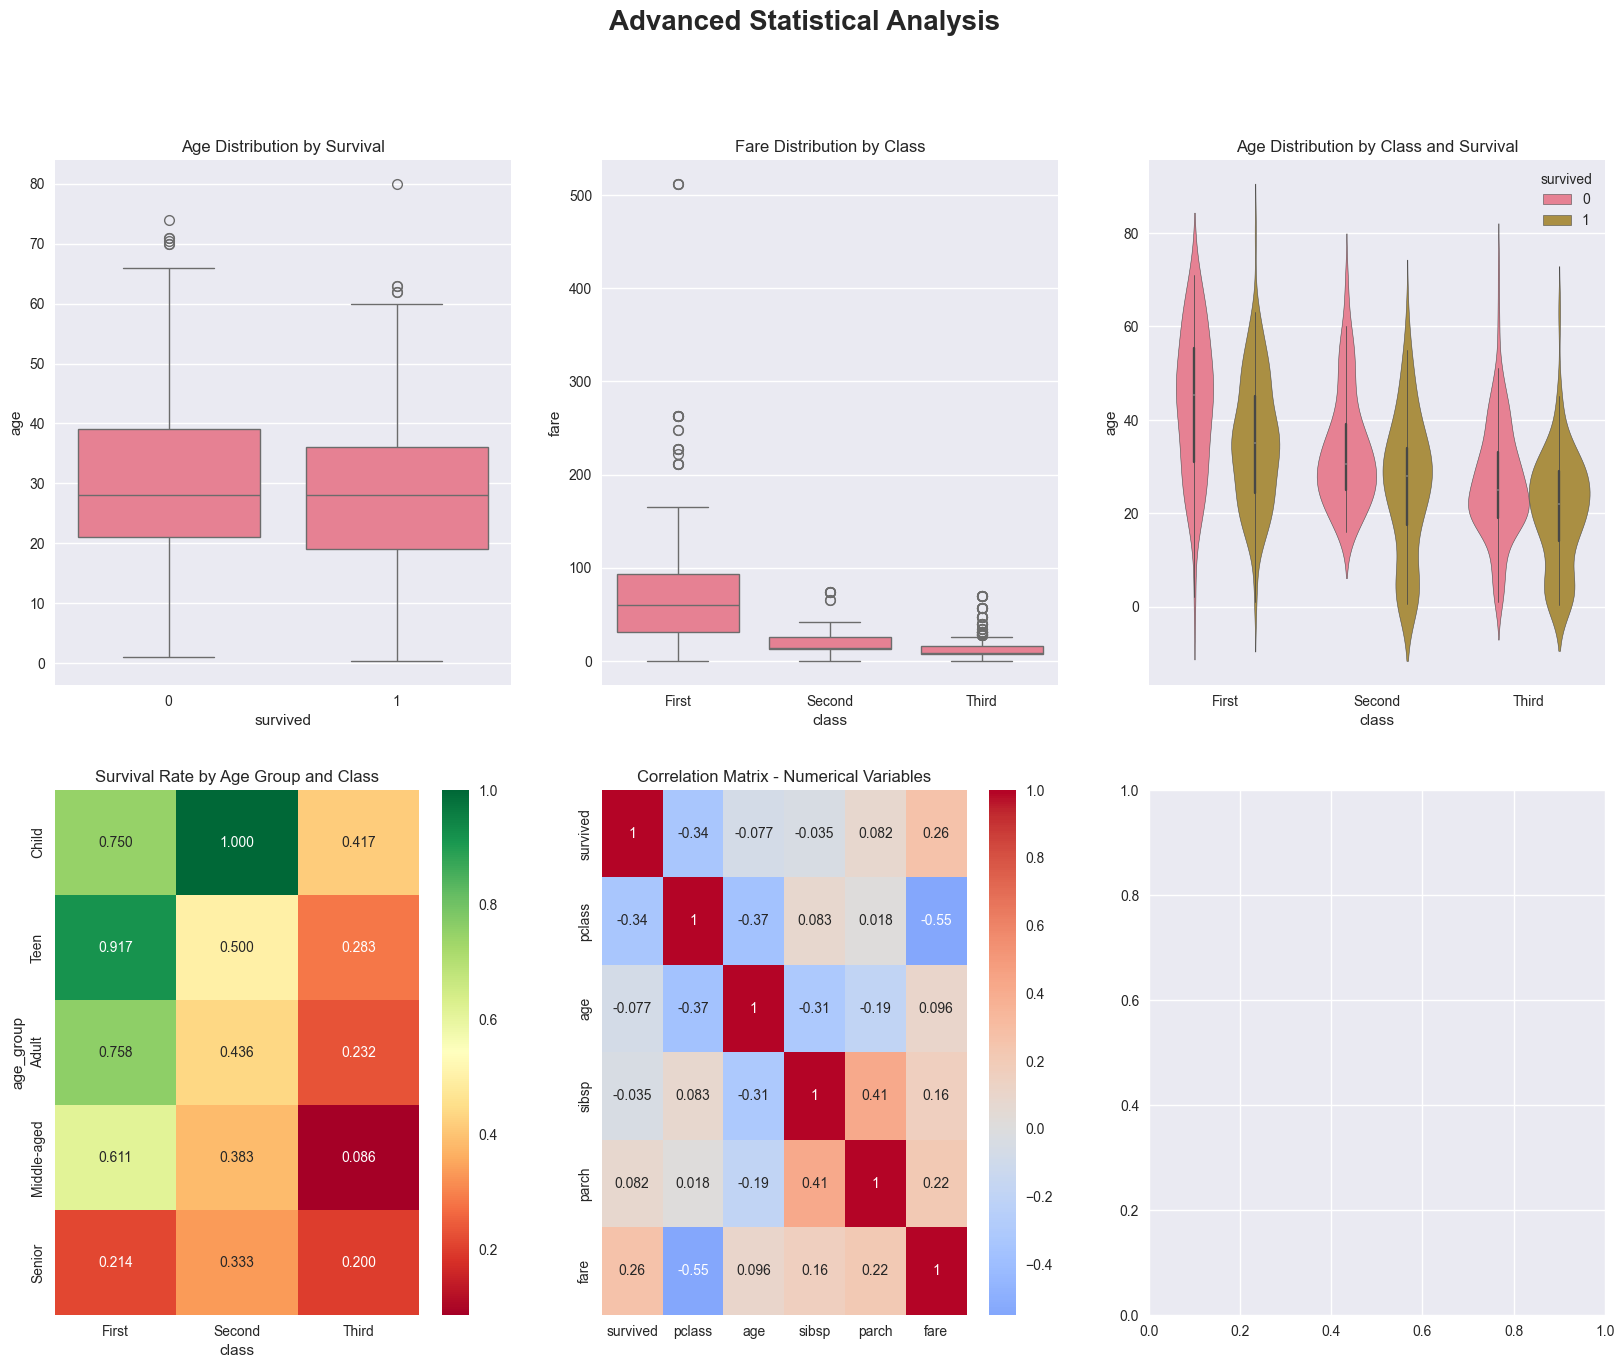

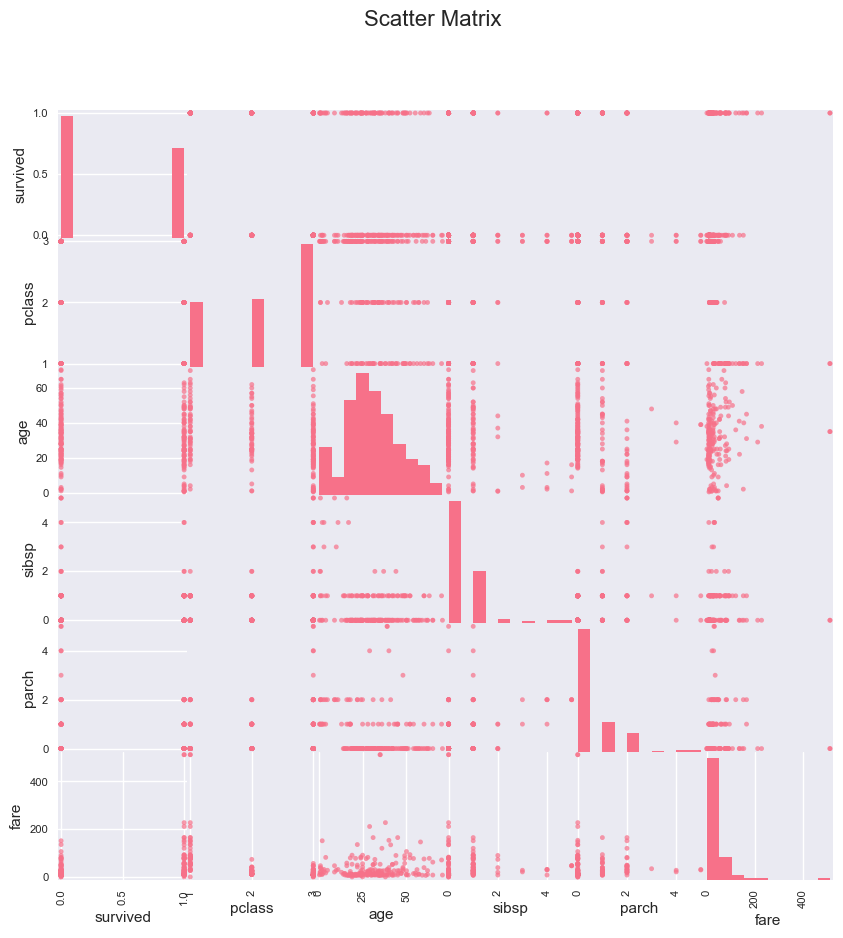

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Advanced Statistical Analysis', fontsize=20, fontweight='bold')

# Box plot
sns.boxplot(data=titanic, x='survived', y='age', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Survival')

sns.boxplot(data=titanic, x='class', y='fare', ax=axes[0,1])
axes[0,1].set_title('Fare Distribution by Class')

# Violin plot
sns.violinplot(data=titanic, x='class', y='age', hue='survived', ax=axes[0,2])
axes[0,2].set_title('Age Distribution by Class and Survival')

# Heatmap
titanic_copy = titanic.copy()
titanic_copy['age_group'] = pd.cut(titanic_copy['age'], bins=[0, 12, 18, 35, 60, 100], 
                                   labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
survival_heatmap = pd.crosstab(titanic_copy['age_group'], titanic_copy['class'], titanic_copy['survived'], aggfunc='mean')
sns.heatmap(survival_heatmap, annot=True, fmt='.3f', ax=axes[1,0], cmap='RdYlGn')
axes[1,0].set_title('Survival Rate by Age Group and Class')

# Correlation heatmap
numeric_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
correlation_matrix = titanic[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Correlation Matrix - Numerical Variables')

# Scatter matrix
sample_data = titanic[numeric_cols].dropna().sample(200)
from pandas.plotting import scatter_matrix
scatter_matrix(sample_data, alpha=0.7, figsize=(10, 10), diagonal='hist')
plt.suptitle('Scatter Matrix', fontsize=16)
plt.show()


### Detailed Survival Analysis by Factor

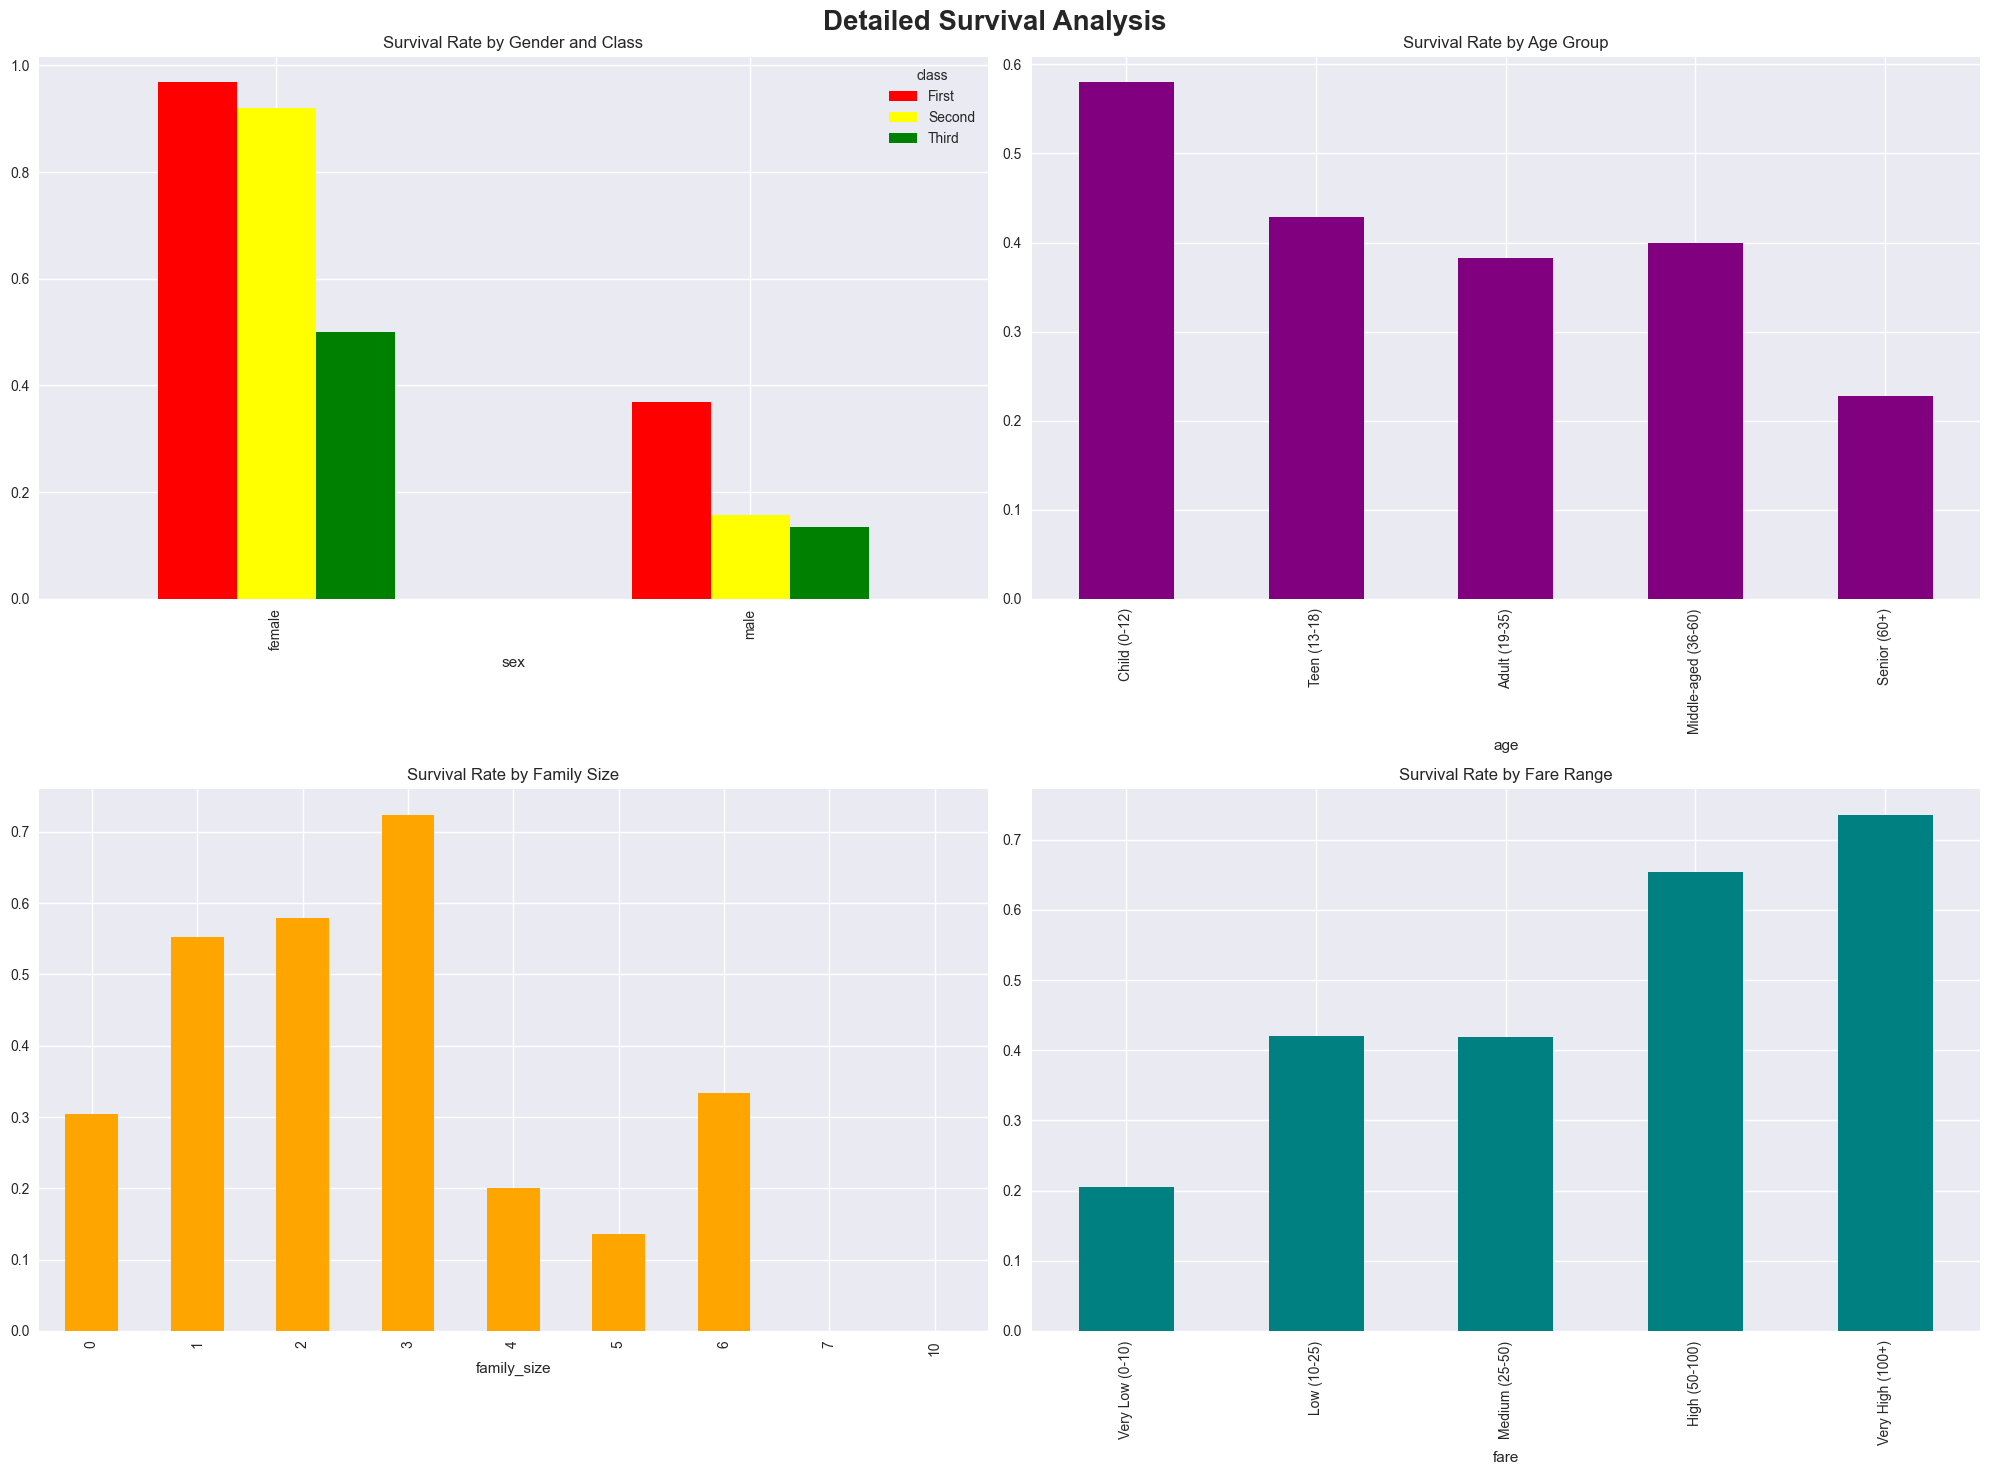

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Detailed Survival Analysis', fontsize=20, fontweight='bold')

# Survival by gender and class
survival_by_gender_class = titanic.groupby(['sex', 'class'])['survived'].mean().unstack()
survival_by_gender_class.plot(kind='bar', ax=axes[0,0], color=['red', 'yellow', 'green'])
axes[0,0].set_title('Survival Rate by Gender and Class')

# Survival by age group
age_groups = pd.cut(titanic['age'], bins=[0, 12, 18, 35, 60, 100], 
                    labels=['Child (0-12)', 'Teen (13-18)', 'Adult (19-35)', 'Middle-aged (36-60)', 'Senior (60+)'])
survival_by_age = titanic.groupby(age_groups)['survived'].agg(['count', 'sum', 'mean'])
survival_by_age['mean'].plot(kind='bar', ax=axes[0,1], color='purple')
axes[0,1].set_title('Survival Rate by Age Group')

# Survival by family size
family_survival = titanic.groupby('family_size')['survived'].mean()
family_survival.plot(kind='bar', ax=axes[1,0], color='orange')
axes[1,0].set_title('Survival Rate by Family Size')

# Survival by fare range
fare_ranges = pd.cut(titanic['fare'], bins=[0, 10, 25, 50, 100, 600], 
                     labels=['Very Low (0-10)', 'Low (10-25)', 'Medium (25-50)', 'High (50-100)', 'Very High (100+)'])
survival_by_fare = titanic.groupby(fare_ranges)['survived'].mean()
survival_by_fare.plot(kind='bar', ax=axes[1,1], color='teal')
axes[1,1].set_title('Survival Rate by Fare Range')

plt.tight_layout()
plt.show()


### Statistical Testing and Correlation Analysis

In [24]:
# Chi-square: Gender vs Survival
contingency_gender = pd.crosstab(titanic['sex'], titanic['survived'])
chi2_gender, p_gender, dof_gender, _ = chi2_contingency(contingency_gender)

# Chi-square: Class vs Survival
contingency_class = pd.crosstab(titanic['class'], titanic['survived'])
chi2_class, p_class, dof_class, _ = chi2_contingency(contingency_class)

# T-test: Age
survivors_age = titanic[titanic['survived'] == 1]['age'].dropna()
non_survivors_age = titanic[titanic['survived'] == 0]['age'].dropna()
t_stat_age, p_val_age = stats.ttest_ind(survivors_age, non_survivors_age)

# T-test: Fare
survivors_fare = titanic[titanic['survived'] == 1]['fare'].dropna()
non_survivors_fare = titanic[titanic['survived'] == 0]['fare'].dropna()
t_stat_fare, p_val_fare = stats.ttest_ind(survivors_fare, non_survivors_fare)

print(f"Chi-square (Gender): χ² = {chi2_gender:.2f}, p = {p_gender:.5f}, Significant: {p_gender < 0.05}")
print(f"Chi-square (Class): χ² = {chi2_class:.2f}, p = {p_class:.5f}, Significant: {p_class < 0.05}")
print(f"T-test (Age): t = {t_stat_age:.2f}, p = {p_val_age:.5f}, Significant: {p_val_age < 0.05}")
print(f"T-test (Fare): t = {t_stat_fare:.2f}, p = {p_val_fare:.5f}, Significant: {p_val_fare < 0.05}")


print("Pearson Correlation with Survival:")
numerical_vars = ['pclass', 'age', 'sibsp', 'parch', 'fare']
for var in numerical_vars:
    clean = titanic[['survived', var]].dropna()
    corr, p_val = pearsonr(clean['survived'], clean[var])
    print(f"{var}: r = {corr:.3f}, p = {p_val:.5f}")

print("\nFull Correlation Matrix:")
print(titanic[['survived'] + numerical_vars].corr().round(3))


Chi-square (Gender): χ² = 260.72, p = 0.00000, Significant: True
Chi-square (Class): χ² = 102.89, p = 0.00000, Significant: True
T-test (Age): t = -2.07, p = 0.03912, Significant: True
T-test (Fare): t = 7.94, p = 0.00000, Significant: True
Pearson Correlation with Survival:
pclass: r = -0.338, p = 0.00000
age: r = -0.077, p = 0.03912
sibsp: r = -0.035, p = 0.29224
parch: r = 0.082, p = 0.01480
fare: r = 0.257, p = 0.00000

Full Correlation Matrix:
          survived  pclass    age  sibsp  parch   fare
survived     1.000  -0.338 -0.077 -0.035  0.082  0.257
pclass      -0.338   1.000 -0.369  0.083  0.018 -0.549
age         -0.077  -0.369  1.000 -0.308 -0.189  0.096
sibsp       -0.035   0.083 -0.308  1.000  0.415  0.160
parch        0.082   0.018 -0.189  0.415  1.000  0.216
fare         0.257  -0.549  0.096  0.160  0.216  1.000


### Final Summary

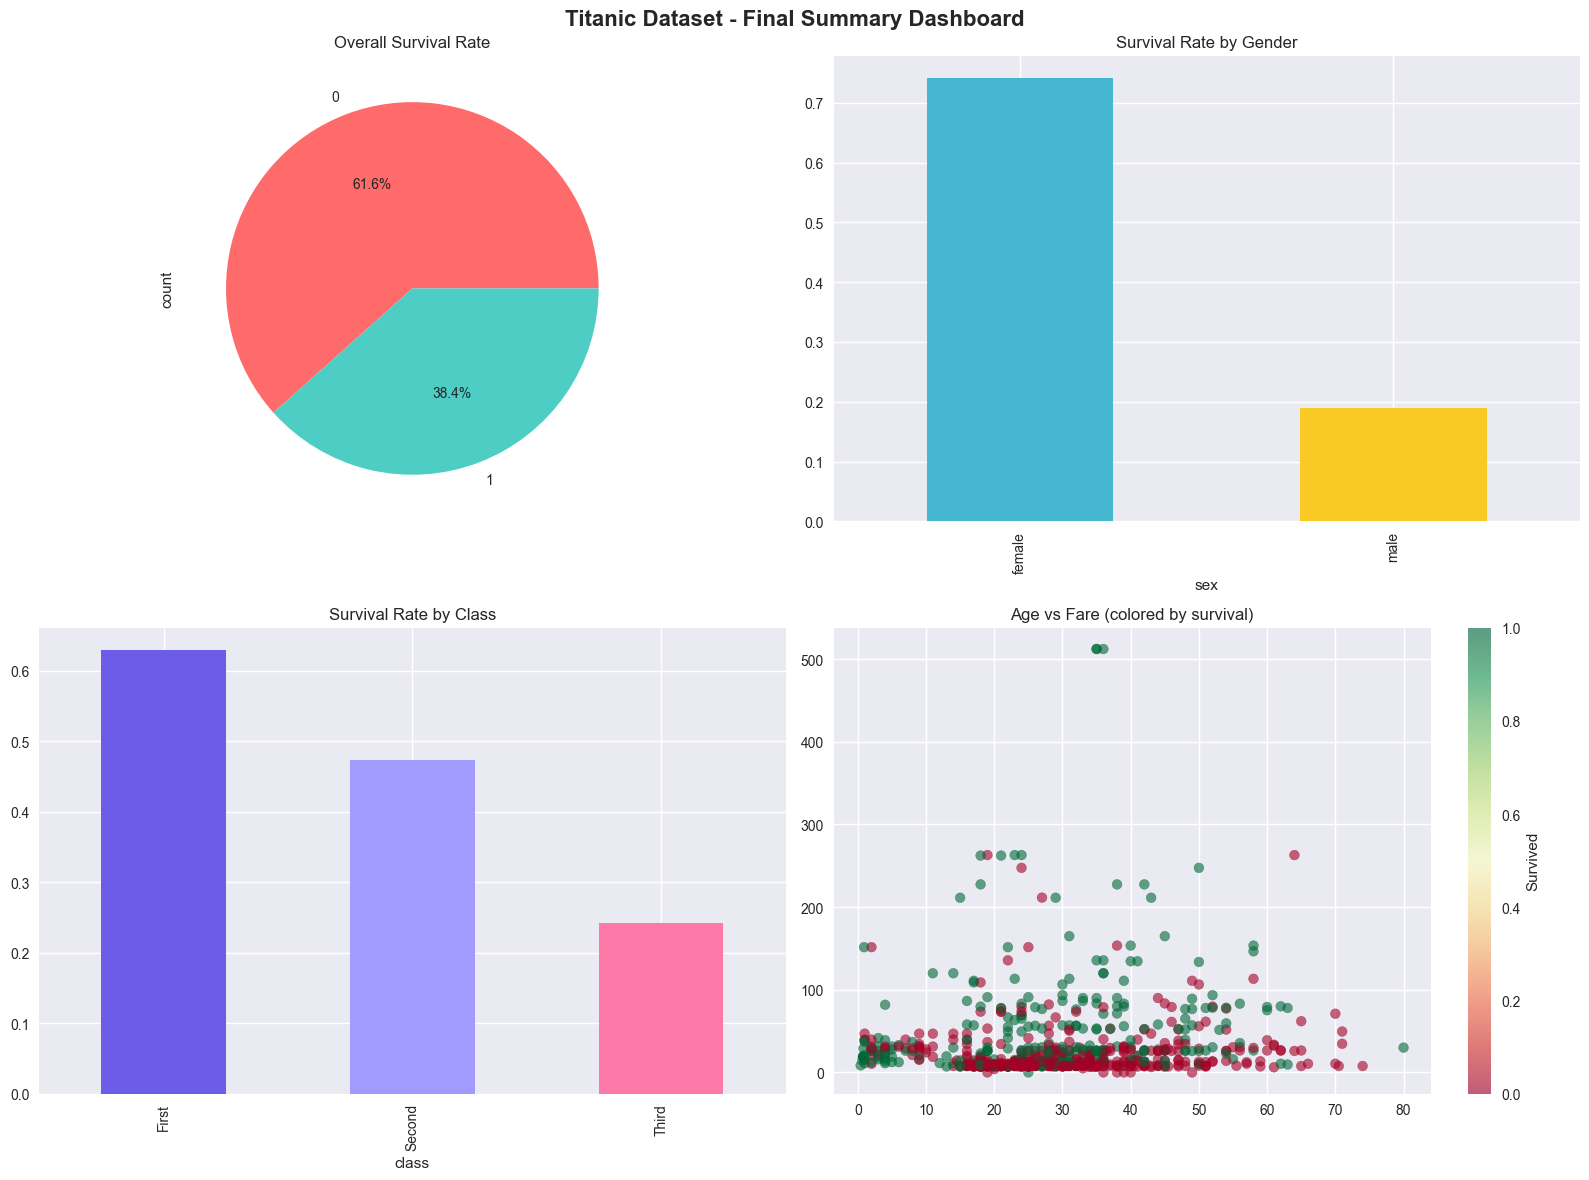

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Titanic Dataset - Final Summary Dashboard', fontsize=16, fontweight='bold')

survival_counts.plot(kind='pie', ax=ax1, autopct='%1.1f%%', colors=['#ff6b6b', '#4ecdc4'])
ax1.set_title('Overall Survival Rate')

gender_survival = titanic.groupby('sex')['survived'].mean()
gender_survival.plot(kind='bar', ax=ax2, color=['#45b7d1', '#f9ca24'])
ax2.set_title('Survival Rate by Gender')

class_survival = titanic.groupby('class')['survived'].mean()
class_survival.plot(kind='bar', ax=ax3, color=['#6c5ce7', '#a29bfe', '#fd79a8'])
ax3.set_title('Survival Rate by Class')

scatter = ax4.scatter(titanic['age'], titanic['fare'], c=titanic['survived'], cmap='RdYlGn', alpha=0.6, s=50)
ax4.set_title('Age vs Fare (colored by survival)')
plt.colorbar(scatter, ax=ax4, label='Survived')

plt.tight_layout()
plt.show()


### Key Insignts

In [26]:
# Gender-Class survival
gender_class_survival = titanic.groupby(['sex', 'class'])['survived'].agg(['count', 'mean'])

# Age group-gender survival
age_gender_survival = titanic.groupby([age_groups, 'sex'])['survived'].agg(['count', 'mean'])

# Title feature
titanic['title'] = titanic['who'].map({'man': 'Mr', 'woman': 'Mrs/Miss', 'child': 'Child'})
title_survival = titanic.groupby('title')['survived'].agg(['count', 'mean'])

print("Survival by Gender & Class:\n", gender_class_survival.round(3))
print("\nSurvival by Age Group & Gender:\n", age_gender_survival.round(3))
print("\nSurvival by Title:\n", title_survival.round(3))


Survival by Gender & Class:
                count   mean
sex    class               
female First      94  0.968
       Second     76  0.921
       Third     144  0.500
male   First     122  0.369
       Second    108  0.157
       Third     347  0.135

Survival by Age Group & Gender:
                             count   mean
age                 sex                 
Child (0-12)        female     32  0.594
                    male       37  0.568
Teen (13-18)        female     36  0.750
                    male       34  0.088
Adult (19-35)       female    120  0.783
                    male      238  0.181
Middle-aged (36-60) female     70  0.771
                    male      125  0.192
Senior (60+)        female      3  1.000
                    male       19  0.105

Survival by Title:
           count   mean
title                 
Child        83  0.590
Mr          537  0.164
Mrs/Miss    271  0.756
